In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/3 INTROTOTENSORFLOW/INTROTONEURALNETWORKS INTROTOTENSORFLOW 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [2]:
# =================================================-
#### Slide 12: Load TensorFlow for Python  ####

#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [3]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/3 INTROTOTENSORFLOW/INTROTONEURALNETWORKS INTROTOTENSORFLOW 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [1]:
# =================================================-
#### Slide 5: Loading packages  ####

import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

# Scikit-learn packages.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

# TensorFlow and supporting packages.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

/var/folders/0k/09bdrlmx63qf4jwt8dw7nrvc0000gn/T/ipykernel_20481/531490083.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# =================================================-
#### Slide 6: Directory settings  ####

# Set 'main_dir' to location of the project folder
# from pathlib import Path

# home_dir = Path(".").resolve()
# main_dir = home_dir.parent.parent
# print(main_dir)
# data_dir = str(main_dir) + "/data"
# print(data_dir)

In [3]:
# =================================================-
#### Slide 7: Load the data  ####

# credit_card = pd.read_csv(str(data_dir) + "/credit_card_data.csv")
# print(credit_card.head())

In [4]:
from pathlib import Path

data_dir = Path.cwd().parent.parent / "data"
credit_card = pd.read_csv(data_dir / "credit_card_data.csv")
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# =================================================-
#### Slide 11: Data prep: convenience function (cont'd)  ####


def data_prep(df):
    df = pd.get_dummies(
        df.fillna(df.mean()).set_index("ID"),
        columns=["SEX", "EDUCATION", "MARRIAGE"],
        drop_first=True,
    )
    X = df.drop(["default_payment_next_month"], axis=1)
    y = df["default_payment_next_month"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1
    )
    min_max_scaler = preprocessing.MinMaxScaler()
    return (
        min_max_scaler.fit_transform(X_train),
        min_max_scaler.transform(X_test),
        y_train,
        y_test,
    )

In [6]:
# =================================================-
#### Slide 12: Data prep  ####

X_train_scaled, X_test_scaled, y_train, y_test = data_prep(credit_card)

In [7]:
credit_card.shape

(30000, 25)

In [8]:
# =================================================-
#### Slide 16: Implement Sequential model with Dense layers  ####

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Let's set the seed so that we can reproduce the results.
tf.random.set_seed(1)

## Set up model.
model = Sequential(
    [
    Dense(32, input_shape=(X_train_scaled.shape[1],)),
    Dense(20, activation="relu"),
    Dense(1, activation="sigmoid"),
    ]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1673 (6.54 KB)
Trainable params: 1673 (6.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


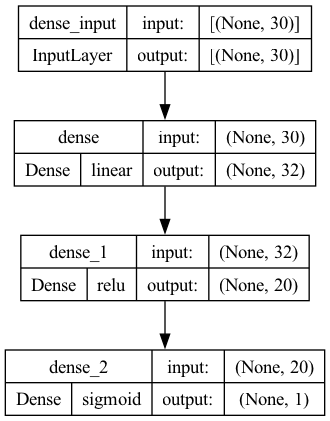

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [11]:
# =================================================-
#### Slide 17: Compile the model  ####

# Compile the model.
model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.Precision(),
                      ])

In [12]:
# =================================================-
#### Slide 18: Fit the model  ####

model.fit(
    X_train_scaled,
    y_train,
    validation_split=.215,
    epochs=100,
    verbose=0,
    callbacks=[keras.callbacks.EarlyStopping(patience=3)],
)

In [13]:
hist = pd.DataFrame(model.history.history)

In [14]:
hist.head()

,loss,binary_accuracy,recall,precision,val_loss,val_binary_accuracy,val_recall,val_precision
0,0.499036,0.783985,0.074570,0.612108,0.459993,0.807309,0.183590,0.707510
1,0.467675,0.802669,0.226441,0.663200,0.448898,0.819934,0.270769,0.721311
2,0.460988,0.806733,0.268779,0.659076,0.442441,0.822813,0.303590,0.709832
3,0.459526,0.809463,0.281890,0.668394,0.443693,0.819048,0.238974,0.756494
4,0.456669,0.809888,0.287353,0.667089,0.439897,0.827021,0.347692,0.700413


In [15]:
hist.shape

(12, 8)

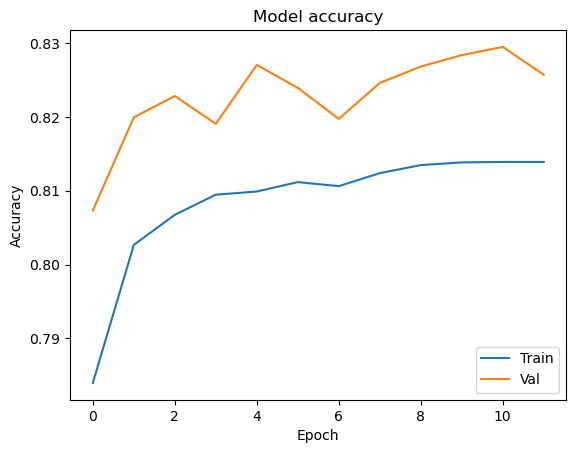

In [16]:
# =================================================-
#### Slide 21: Visualize training/validation accuracy for each epoch  ####

hist[["binary_accuracy", "val_binary_accuracy"]].plot(
    title="Model accuracy",
    xlabel="Epoch",
    ylabel="Accuracy",
).legend(["Train", "Val"], loc="lower right");

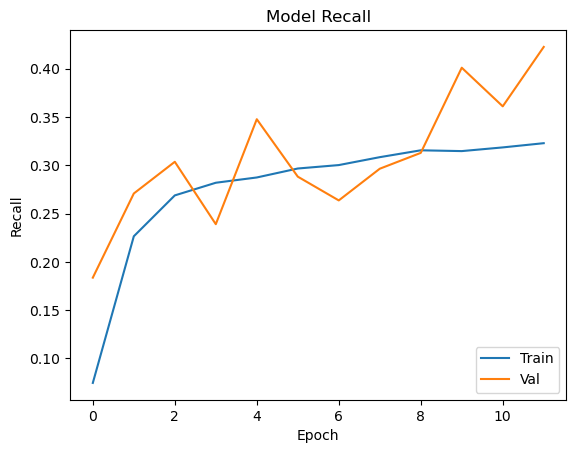

In [17]:
hist[["recall", "val_recall"]].plot(
    title="Model Recall",
    xlabel="Epoch",
    ylabel="Recall",
).legend(["Train", "Val"], loc="lower right");

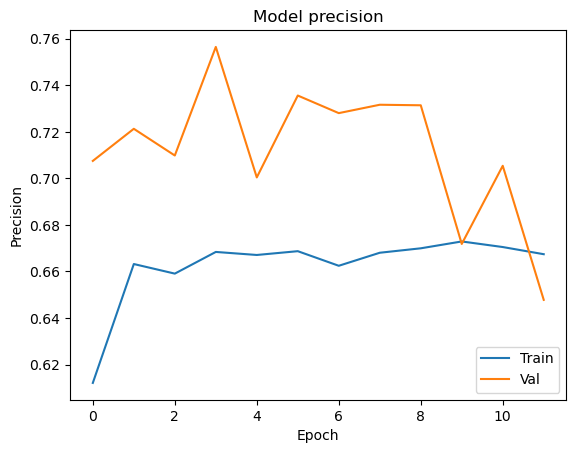

In [18]:
hist[["precision", "val_precision"]].plot(
    title="Model precision",
    xlabel="Epoch",
    ylabel="Precision",
).legend(["Train", "Val"], loc="lower right");

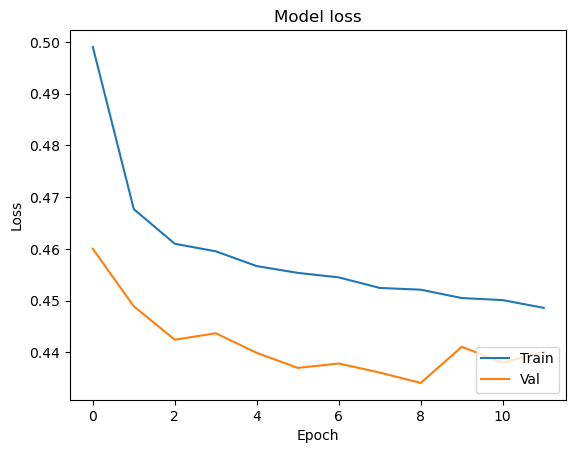

In [19]:
# =================================================-
#### Slide 22: Visualize training/validation loss for each epoch  ####

# Plot training & validation loss values
hist[["loss", "val_loss"]].plot(
    title="Model loss",
    xlabel="Epoch",
    ylabel="Loss",
).legend(["Train", "Val"], loc="lower right");

In [20]:
# =================================================-
#### Slide 23: Evaluate loss, accuracy on test data and predict  ####

loss, accuracy, recall, precision = model.evaluate(x=X_test_scaled, y=y_test)

282/282 [==============================] - 0s 397us/step - loss: 0.4526 - binary_accuracy: 0.8139 - recall: 0.3900 - precision: 0.6316


In [21]:
y_pred_prob = model.predict(X_test_scaled)
y_pred_prob

282/282 [==============================] - 0s 303us/step


array([[0.15814623],
       [0.1302067 ],
       [0.13197026],
       ...,
       [0.15541787],
       [0.15783453],
       [0.13659288]], dtype=float32)

In [22]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
y_pred

282/282 [==============================] - 0s 374us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [23]:
model.save("credit-card-default-nn.tf")

INFO:tensorflow:Assets written to: credit-card-default-nn.tf/assets


INFO:tensorflow:Assets written to: credit-card-default-nn.tf/assets


In [24]:
loaded_model = tf.keras.models.load_model("credit-card-default-nn.tf")

In [25]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1673 (6.54 KB)
Trainable params: 1673 (6.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


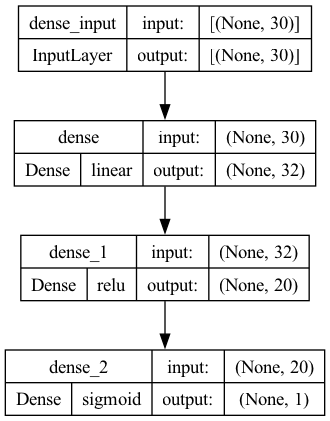

In [26]:
tf.keras.utils.plot_model(loaded_model, show_shapes=True, show_layer_activations=True)

In [36]:
model.trainable

True

In [37]:
model.layers[1].trainable = False

In [38]:
[l.trainable for l in model.layers]

[True, False, True]

In [39]:
model.trainable = False

In [40]:
[l.trainable for l in model.layers]

[False, False, False]

In [41]:
model.layers[1].trainable = True

In [42]:
[l.trainable for l in model.layers]

[False, True, False]

In [ ]:
tf.keras.Sequential

In [ ]:
# =================================================-
#### Slide 25: Exercise  ####


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################